<a href="https://colab.research.google.com/github/Reena6878/lohan/blob/master/handling_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
impoert

handling missing values


In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:

import matplotlib.pyplot as plt

In [5]:

df=pd.read_csv("/content/Episodes.csv")

In [6]:
df.head(3)

,episode_id,episode_name,heroes,heroes_gender,heroes_location,heroes_nationality,heroes_kaggle_username,heroes_twitter_handle,category,flavour_of_tea,...,youtube_subscribers,anchor_url,anchor_thumbnail_type,anchor_plays,spotify_starts,spotify_streams,spotify_listeners,apple_listeners,apple_listened_hours,apple_avg_listen_duration
0,E0,Chai Time Data Science Launch Announcement,NaN,NaN,NaN,NaN,NaN,NaN,Other,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,553.0,491.0,262.0,359.0,29.0,1.0,117.0
1,E1,"Kaggle Triple Grandmaster, Abhishek Thakur Int...",Abhishek Thakur,Male,Norway,India,abhishek,abhi1thakur,Kaggle,Ginger Chai,...,60,https://anchor.fm/chaitimedatascience/episodes...,0.0,1271.0,826.0,608.0,456.0,56.0,25.0,1621.0
2,E2,"Interview with Kaggle Master, ML Engineer: Rya...",Ryan Chesler,Male,USA,USA,ryches,ryan_chesler,Kaggle,Masala Chai,...,3,https://anchor.fm/chaitimedatascience/episodes...,0.0,681.0,398.0,274.0,214.0,19.0,10.0,1879.0


In [7]:
df.isnull().sum()

episode_id                      0
episode_name                    0
heroes                         11
heroes_gender                  11
heroes_location                11
heroes_nationality             11
heroes_kaggle_username         39
heroes_twitter_handle          19
category                        0
flavour_of_tea                  0
recording_date                  0
recording_time                  0
release_date                    0
episode_duration                0
youtube_url                     0
youtube_thumbnail_type          0
youtube_impressions             0
youtube_impression_views        0
youtube_ctr                     0
youtube_nonimpression_views     0
youtube_views                   0
youtube_watch_hours             0
youtube_avg_watch_duration      0
youtube_likes                   0
youtube_dislikes                0
youtube_comments                0
youtube_subscribers             0
anchor_url                      1
anchor_thumbnail_type           1
anchor_plays  

In [8]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]
cols

['anchor_url',
 'anchor_thumbnail_type',
 'anchor_plays',
 'spotify_starts',
 'spotify_streams',
 'spotify_listeners',
 'apple_listeners',
 'apple_listened_hours',
 'apple_avg_listen_duration']

In [9]:
df[cols].sample(5)

,anchor_url,anchor_thumbnail_type,anchor_plays,spotify_starts,spotify_streams,spotify_listeners,apple_listeners,apple_listened_hours,apple_avg_listen_duration
26,https://anchor.fm/chaitimedatascience/episodes...,1.0,684.0,130.0,86.0,83.0,41.0,17.0,1503.0
35,https://anchor.fm/chaitimedatascience/episodes...,1.0,590.0,114.0,74.0,56.0,22.0,12.0,1962.0
21,https://anchor.fm/chaitimedatascience/episodes...,0.0,693.0,177.0,119.0,110.0,42.0,28.0,2384.0
75,https://anchor.fm/chaitimedatascience/episodes...,1.0,402.0,51.0,36.0,24.0,15.0,15.0,3494.0
78,https://anchor.fm/chaitimedatascience/episodes...,3.0,342.0,24.0,16.0,16.0,17.0,9.0,1992.0


In [10]:
len(df[cols].dropna())/len(df)

0.9764705882352941

In [11]:
new_df=df[cols].dropna()
df.shape,new_df.shape

((85, 36), (83, 9))

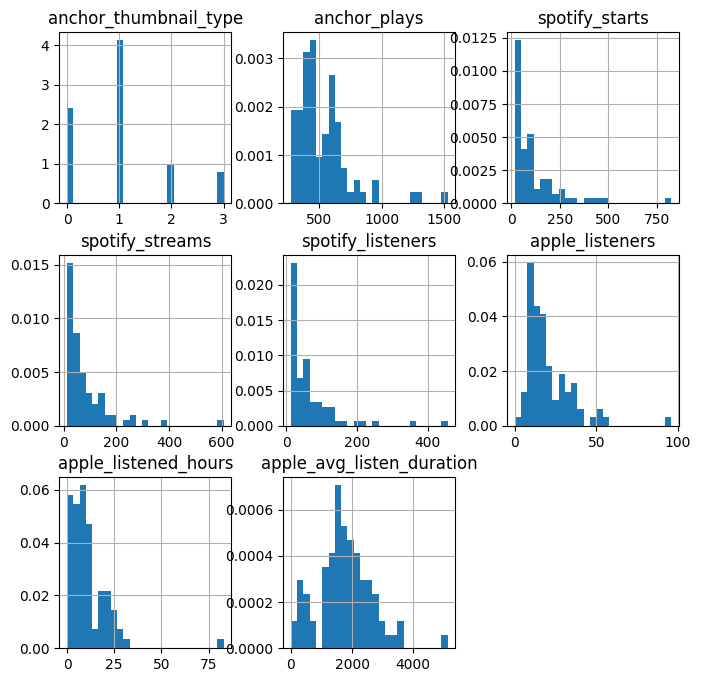

In [12]:
new_df.hist(bins=25,density=True,figsize=(8,8))
plt.show()

<Axes: >

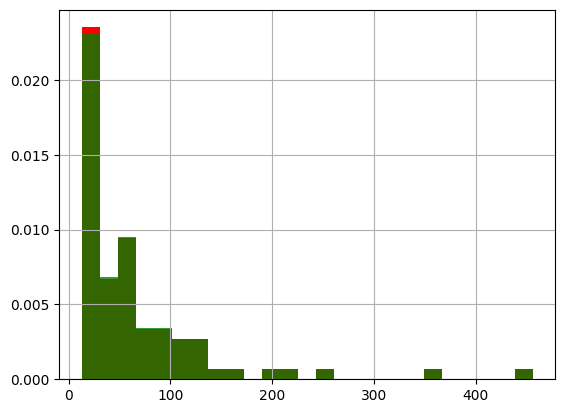

In [13]:
fig=plt.figure()
ax=fig.add_subplot(111)

#original data
df['spotify_listeners'].hist(bins=25,ax=ax,density=True,color='red')

#data after cca
new_df['spotify_listeners'].hist(bins=25,ax=ax,color='green',density=True,alpha=0.8)

In [15]:
temp=pd.concat([
    #percentage of observation per category,original data
    df['spotify_starts'].value_counts()/len(df),

    #percentage of observation per category cca data
    new_df['spotify_starts'].value_counts()/len(new_df)
],
              axis=1)
temp.columns=['original','cca']
temp

,original,cca
24.0,0.047059,0.048193
33.0,0.047059,0.048193
54.0,0.035294,0.036145
49.0,0.035294,0.036145
20.0,0.023529,0.024096
...,...,...
81.0,0.011765,0.012048
83.0,0.011765,0.012048
61.0,0.011765,0.012048
108.0,0.011765,0.012048
